In [1]:
import collections
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
train_images = mnist.train.images
test_images = mnist.test.images

# single_number_train_data_all = np.array(
#     [mnist.train.images[idx] for idx, one in enumerate(mnist.train.labels) if one[2] == 1])
#
# split_point = int(single_number_train_data_all.shape[0] * 0.9)
# single_number_train_data = single_number_train_data_all[:split_point]
# single_number_validate_data = single_number_train_data_all[split_point:]
#
# single_number_train_labels_all = np.array(
#     [mnist.train.labels[idx] for idx, one in enumerate(mnist.train.labels) if one[2] == 1])
# single_number_train_labels = single_number_train_labels_all[:split_point]
# single_number_validate_labels = single_number_train_labels_all[split_point:]

ones_train_images = np.array([mnist.train.images[idx] for idx, labels in enumerate(mnist.train.labels) if labels[1] == 1])
ones_train_labels = np.array([mnist.train.labels[idx, 1:3] for idx, labels in enumerate(mnist.train.labels) if labels[1] == 1])

twos_train_images = np.array([mnist.train.images[idx] for idx, labels in enumerate(mnist.train.labels) if labels[2] == 1])
twos_train_labels = np.array([mnist.train.labels[idx, 1:3] for idx, labels in enumerate(mnist.train.labels) if labels[2] == 1])

ones_test_images = np.array([mnist.test.images[idx] for idx, labels in enumerate(mnist.test.labels) if labels[1] == 1])
ones_test_labels = np.array([mnist.test.labels[idx, 1:3] for idx, labels in enumerate(mnist.test.labels) if labels[1] == 1])

twos_test_images = np.array([mnist.test.images[idx] for idx, labels in enumerate(mnist.test.labels) if labels[2] == 1])
twos_test_labels = np.array([mnist.test.labels[idx, 1:3] for idx, labels in enumerate(mnist.test.labels) if labels[2] == 1])

train_images = np.vstack((ones_train_images, twos_train_images))
train_labels = np.vstack((ones_train_labels, twos_train_labels))

test_images = np.vstack((ones_test_images, twos_test_images))
test_labels = np.vstack((ones_test_labels, twos_test_labels))

shuffle_train = np.random.permutation(train_images.shape[0])
train_images = train_images[shuffle_train]
train_labels = train_labels[shuffle_train]

shuffle_test = np.random.permutation(test_images.shape[0])
test_images = test_images[shuffle_test]
test_labels = test_labels[shuffle_test]

print(test_images.shape)
print(test_labels.shape)

print(train_images.shape)
print(train_labels.shape)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(2167, 784)
(2167, 2)
(11649, 784)
(11649, 2)


In [3]:
from my_rbm import Rbm
rbm = Rbm(num_hidden=64, num_epochs=1, num_classes=test_labels.shape[1], num_features=test_images.shape[1])
rbm.init_rbm()

rbm.fit(train_images, test_images)
rbm.fit_predictor(train_data=train_images, train_labels=train_labels,
                  test_data=test_images, test_labels=test_labels)

Number of features: 784
Number of classes: 2
('logit shape: ', TensorShape([Dimension(None), Dimension(2)]))
('batch_labels shape: ', TensorShape([Dimension(None), Dimension(2)]))
Train set dimensions: (11649, 784)
epoch: 0
Reconstruction loss at epoch 0: 0.221548
Initialized fit predictor.
('Adding run metadata for', 0)
step 0, training accuracy 0.2
('Adding run metadata for', 10)
step 10, training accuracy 0.6
('Adding run metadata for', 20)
step 20, training accuracy 0.8
('Adding run metadata for', 30)
step 30, training accuracy 0.9
('Adding run metadata for', 40)
step 40, training accuracy 0.6
('Adding run metadata for', 50)
step 50, training accuracy 0.9
('Adding run metadata for', 60)
step 60, training accuracy 0.7
('Adding run metadata for', 70)
step 70, training accuracy 0.7
('Adding run metadata for', 80)
step 80, training accuracy 0.9
('Adding run metadata for', 90)
step 90, training accuracy 0.3
('Adding run metadata for', 100)
step 100, training accuracy 0.1
('Adding run me

In [4]:
rbm.predict(train_images[0:10])

array([[ 0.52310717,  0.47689283],
       [ 0.52310717,  0.47689283],
       [ 0.52310717,  0.47689283],
       [ 0.52310717,  0.47689283],
       [ 0.52310717,  0.47689283],
       [ 0.52310717,  0.47689283],
       [ 0.52310717,  0.47689283],
       [ 0.52310717,  0.47689283],
       [ 0.52604681,  0.47395319],
       [ 0.52310717,  0.47689283]], dtype=float32)

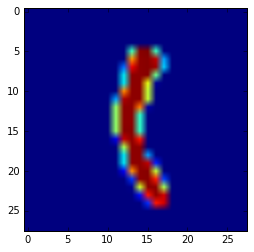

In [9]:
plt.imshow(train_images[500].reshape(28,28))

In [10]:
train_labels[500]

array([ 1.,  0.])